In [1]:
# 1️⃣ Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


In [2]:

# 2️⃣ Create a student dataset
# Columns: Study Hours, Attendance (%)
data = {
    'Student': ['A','B','C','D','E','F','G','H','I','J'],
    'StudyHours': [2, 3, 4, 5, 6, 7, 8, 9, 10, 5],
    'Attendance': [50, 55, 60, 65, 70, 75, 80, 85, 90, 60]
}



In [3]:
df = pd.DataFrame(data)

# Features for clustering
X = df[['StudyHours', 'Attendance']].values


In [4]:

# 3️⃣ Build K-Means model
k = 2  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)



,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
# 4️⃣ Predict clusters
df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

df
centroids

array([[ 4.16666667, 60.        ],
       [ 8.5       , 82.5       ]])

In [8]:
import joblib
joblib.dump(kmeans, "kmeans_student_model.pkl")


['kmeans_student_model.pkl']

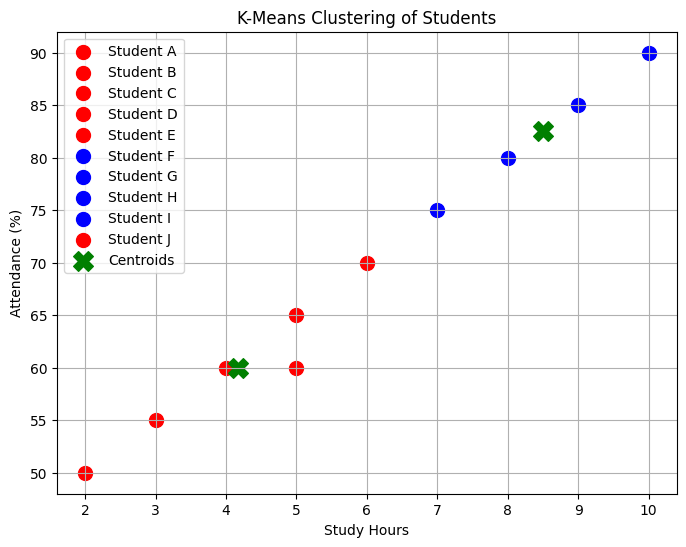

In [6]:
# 5️⃣ Plot clusters
plt.figure(figsize=(8,6))
colors = ['red','blue']

for i in range(len(X)):
    plt.scatter(X[i,0], X[i,1], color=colors[df['Cluster'][i]], s=100, label=f"Student {df['Student'][i]}")

# Plot centroids
plt.scatter(centroids[:,0], centroids[:,1], color='green', marker='X', s=200, label='Centroids')

plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("K-Means Clustering of Students")
plt.legend()
plt.grid(True)
plt.show()

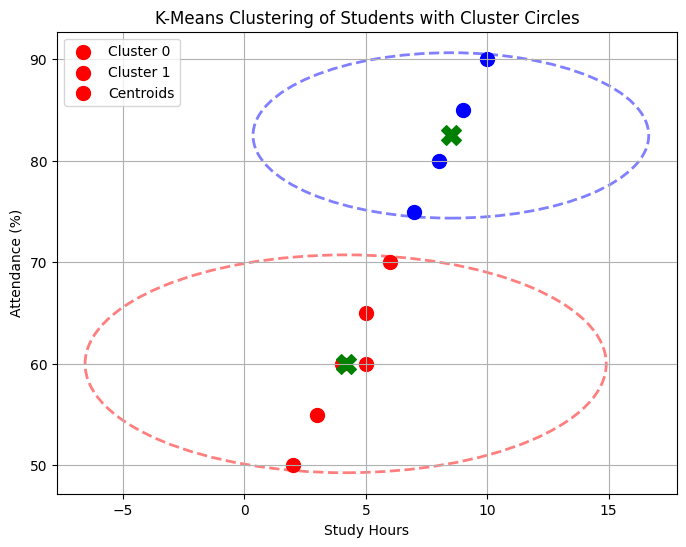

In [7]:
# 5️⃣ Plot clusters with circles
plt.figure(figsize=(8,6))
colors = ['red','blue']

# Scatter points
for i in range(len(X)):
    plt.scatter(X[i,0], X[i,1], color=colors[df['Cluster'][i]], s=100)

# Plot centroids
plt.scatter(centroids[:,0], centroids[:,1], color='green', marker='X', s=200, label='Centroids')

# Draw circles around clusters
for cluster_idx in range(k):
    # Get points belonging to this cluster
    cluster_points = X[df['Cluster'] == cluster_idx]
    # Compute cluster center
    cx, cy = centroids[cluster_idx]
    # Compute radius as max distance from center to points
    radius = np.max(np.sqrt((cluster_points[:,0]-cx)**2 + (cluster_points[:,1]-cy)**2)) + 0.5
    # Draw circle
    circle = plt.Circle((cx, cy), radius, color=colors[cluster_idx], fill=False, linestyle='--', linewidth=2, alpha=0.5)
    plt.gca().add_patch(circle)

plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("K-Means Clustering of Students with Cluster Circles")
plt.legend(['Cluster 0','Cluster 1','Centroids'])
plt.grid(True)
plt.show()
